# Hypothesis Testing

* Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data.  Hypothesis Testing is basically an assumption that we make about the population parameter.


**Null hypothesis:** Null hypothesis is a statistical hypothesis that assumes that the observation is due to a chance factor.  Null hypothesis is denoted by; H0: μ1 = μ2, which shows that there is no difference between the two population means.

**Alternative hypothesis:** Contrary to the null hypothesis, the alternative hypothesis shows that observations are the result of a real effect.

**Level of significance:** Refers to the degree of significance in which we accept or reject the null-hypothesis.  100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.

**One-tailed test:**
When the given statistical hypothesis is one value like H0: μ1 = μ2, it is called the one-tailed test.

**Two-tailed test:** When the given statistics hypothesis assumes a less than or greater than value, it is called the two-tailed test.

# Hypotheis Testing 


**Step - 1:**  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

**Step - 2:**  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

**Step - 3:**
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

**Step - 4:**
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

**Step - 5.1:** Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


**Type I error:** When we reject the null hypothesis, although that hypothesis was true.  Type I error is denoted by alpha.  In hypothesis testing, the normal curve that shows the critical region is called the alpha region.

**Type II errors:** When we accept the null hypothesis but it is false.  Type II errors are denoted by beta.  In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.


**Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?**

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1 =\ 500 $$
Null Hypothesis (Status Quo): $$ H_0 \neq 500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ 465.3 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level 95%

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, t
from math import sqrt

In [2]:
# t_score for sampling distribution
def t_score(sample_size,sample_mean,pop_mean,p_std):
    numerator=sample_mean - pop_mean
    denomenator=p_std/sample_size**0.5
    return numerator/denomenator

In [3]:
from scipy.stats import ttest_1samp
x= [490,220,470,500,495,496,496,498,508,480]
tscore, pvalue = ttest_1samp(x, popmean=500)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  -1.263475128444671
P Value:  0.23816470585327693


In [4]:
x= [490,220,470,500,495,496,496,498,508,480]
sum(x)/len(x)

465.3

In [5]:
# implementing the two tailed test method for calculating the t_critical 

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


In [6]:
sample_std = np.std(x)
sample_std

82.3918078451978

In [7]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 82.39

In [8]:
t=t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

-1.3318489477830164


In [9]:
t

-1.3318489477830164

Text(465.3, 0.0007, 'x_bar')

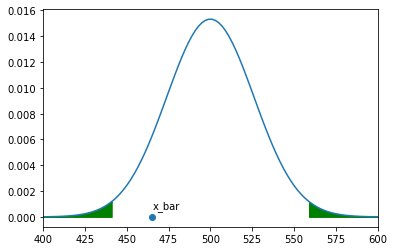

In [10]:
# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='green')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [11]:
print(t)

-1.3318489477830164


In [12]:
# Conclusion using p test

p_value = 1.0 - norm.pdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.8356651793532938
Fail to reject Null Hypothesis


In [13]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?**

In [14]:
#Alternate Hypothesis(Bold Claim): H_1 >=4
#Null Hypothesis(Status quo): H_0  <4

In [15]:
l=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sum(l)/len(l)

4.25

In [16]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [17]:
sample_std = np.std(l)
sample_std

0.82915619758885

In [18]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.82 

In [19]:
t=t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

1.3634560838413352


Text(4.25, 0.1, 'x_bar')

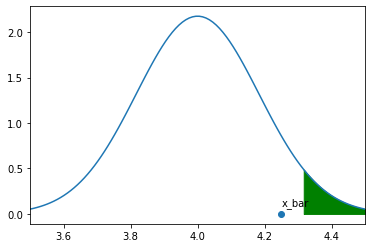

In [20]:
# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')


# Ploting the sample mean and concluding the results 

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [21]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [22]:
# Conclusion using p test

p_value = 1.0 - norm.pdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.8425181049656241
Fail to reject Null Hypothesis


**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?**

In [23]:
#Alternate Hypothesis(Bold Claim): H_1 >15
#Null Hypothesis(Status quo): H_0 <=15

In [24]:
from scipy.stats import ttest_1samp
x=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
tscore, pvalue = ttest_1samp(x, popmean=15)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  0.4317882018907993
P Value:  0.6707555050252283


In [25]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 0.99

In [26]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


Text(15.1, 0.1, 'x_bar')

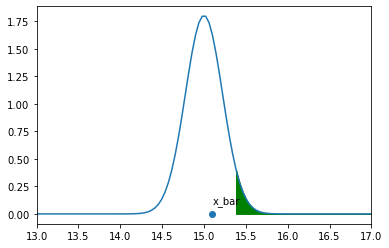

In [27]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
#plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [28]:
if(tscore , t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?**

In [29]:
#Alternate Hypothesis(Bold Claim): H_1 < 100
#Null Hypothesis(Status quo): H_0 >=100

In [30]:
from scipy.stats import ttest_1samp
x=[100,98,102,92,106,87,110,98,99,95,101,92,109,96,100,97,99,104,97,102]
tscore, pvalue = ttest_1samp(x, popmean=100)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  -0.6392199547398622
P Value:  0.5303116999183912


In [31]:
sample_size=20
sample_mean=99.2
pop_mean=100
p_std=5.45

In [32]:
## implementing the one tail test to calculate the t_critical value

from scipy.stats import t

alpha = 1 - 0.99

t_critical = t.ppf(1 - alpha, df=19)

print(t_critical)

2.539483190622288


Text(99.2, 0.02, 'x_bar')

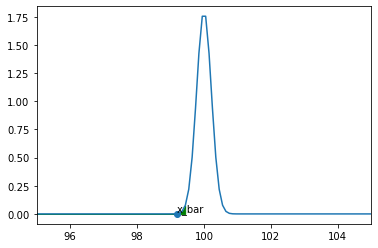

In [33]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [34]:
p_value = 1.0 - norm.cdf(np.abs(tscore))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.26133992624908675
Fail to reject Null Hypothesis
